# GGL of UNIONS galaxies by AGNs

This notebook performs first measurements of galaxy-galaxy lensing between SDSS AGN and UNIONS 3500 deg^2 catalogs.

In [1]:
%matplotlib inline

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii

In [3]:
import treecorr

## Variables

### AGN data

In [5]:
# Path to data
path_to_agn_data = '../data'

# AGN catalogue name
agn_cat_name = 'SDSS_SMBH_202206.txt'

# Columns in data
# ra, dec in deg
# logM is log of SMBH mass in M_sol
names = ['ra', 'dec', 'z', 'logM']

### UNIONS weak-lensing data

In [6]:
# Path to data

version = '1.0'

path_to_unions_data = f'{os.environ["HOME"]}/astro/data/UNIONS/v{version}/ShapePipe'
unions_cat_name = f'unions_shapepipe_extended_2022_v{version}.fits'

### Output

In [11]:
output_path = './output'

output_cc_base = 'ggl_all_UNIONS_v1_agn'

### Plotting

In [8]:
# Figure ticks and labels
ticks_size = 15
label_size = 18

### Units

In [15]:
coord_units = 'degrees'
sep_units = 'arcmin'

## Read catalogs

In [6]:
# AGN
data_agn = ascii.read(f'{path_to_agn_data}/{agn_cat_name}', names=names)

In [7]:
# UNIONS
hdu_list_unions = fits.open(f'{path_to_unions_data}/{unions_cat_name}')

unions_data = hdu_list_unions[1].data

## Computation of correlation

In [8]:
TreeCorrConfig = {
    'ra_units': coord_units,
    'dec_units': coord_units,
    'max_sep': '200',
    'min_sep': '0.1',
    'sep_units': sep_units,
    'nbins': 10
}

In [9]:
cat_mass = treecorr.Catalog(
    ra=data_agn['ra'],
    dec=data_agn['dec'],
    ra_units=coord_units,
    dec_units=coord_units
)

In [10]:
cat_unions = treecorr.Catalog(
    ra=unions_data['ra'],
    dec=unions_data['dec'],
    g1=unions_data['e1'],
    g2=unions_data['e2'],
    w=unions_data['w'],
    ra_units=coord_units,
    dec_units=coord_units
)

In [ ]:
ng = treecorr.NGCorrelation(TreeCorrConfig)
ng.process(cat_mass, cat_unions)

In [16]:
# Write correlation data to file
ng.write(
    f'{output_path}/{output_cc_name}',
    rg=None,
    file_type=None,
    precision=None
)

## Plotting

In [12]:
# Read correlation data file and assign quantities of interest
f = fits.open(f'{output_path}/{output_cc_base}.fits')
data_cc = f[1].data
r_mean = data_cc['meanr']
gamX = data_cc['gamX']
gamT = data_cc['gamT']
sigma = data_cc['sigma']

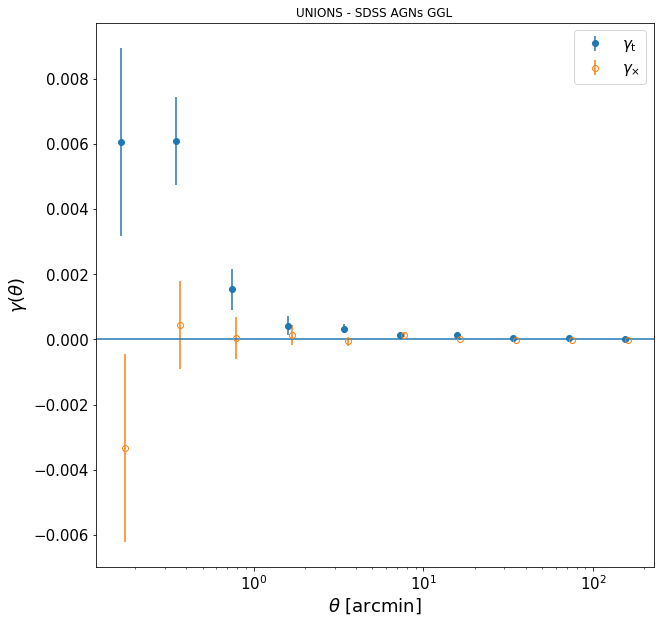

In [53]:
plt.figure(figsize=(10, 10))

fx = 1.05

plt.errorbar(r_mean, gamT, yerr=sigma, fmt='o', label="$\gamma_{\\rm t}$")
plt.errorbar(r_mean*fx, gamX, yerr=sigma, fmt='o', markerfacecolor='none', label= "$\gamma_{\\times}$")
plt.axhline(y=0)

plt.xlabel(rf'$\theta$ [{sep_units}]', fontsize=label_size)
plt.ylabel(r'$\gamma(\theta)$', fontsize=label_size)

plt.xscale("log")
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(fontsize = ticks_size)
plt.title('UNIONS - SDSS AGNs GGL')

_  = plt.savefig(f'{output_path}/{output_cc_base}.pdf')

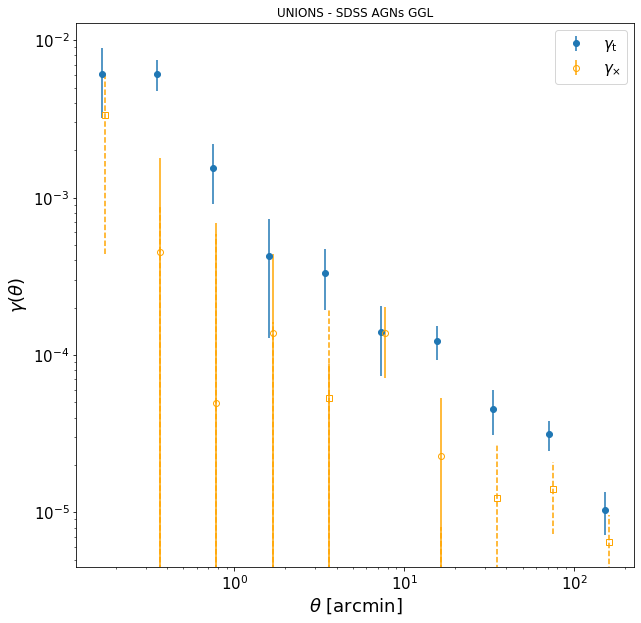

In [52]:
plt.figure(figsize=(10, 10))

fx = 1.05

plt.errorbar(r_mean, gamT, yerr=sigma, fmt='o', label='$\gamma_{{\\rm t}}}$')
plt.errorbar(r_mean, -gamT, yerr=sigma, fmt='s')
plt.errorbar(
    r_mean*fx,
    gamX,
    fmt='o',
    markerfacecolor='none',
    yerr=sigma,
    c='orange',
    label= '$\gamma_{\\times}$'
)
eb = plt.errorbar(r_mean*fx, -gamX, fmt='s', markerfacecolor='none', yerr=sigma, c='orange')
eb[-1][0].set_linestyle('--')

plt.xlabel(rf'$\theta$ [{sep_units}]', fontsize=label_size)
plt.ylabel(r'$\gamma(\theta)$', fontsize=label_size)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(fontsize = ticks_size)
plt.title('UNIONS - SDSS AGNs GGL')

_  = plt.savefig(f'{output_path}/{output_cc_base}_log.pdf')